In [1]:
import sys
sys.path.append("/Applications/Wind API.app/Contents/python")

from data_get_add import fetch_wind_data
from tech_fixed import tech_con
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#import tensorflow as tf

import warnings

# 忽略所有警告
warnings.filterwarnings("ignore")

# 调用函数获取数据
TF, T, TL= fetch_wind_data()
T10=tech_con(T)
T5=tech_con(TF)

#这里选T10，可以改成T5就是预测5年期合约


# 设置 'date' 为索引
data=T10.set_index('date')
data = data.iloc[:-1]

#data.dropna(inplace=True)

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [2]:
data

,S0029657,S0059749,S0059744,S0059747,M0067855,G0000886,G0000889,G0000891,G1306752,G0006352,...,R3,R5,1Y_return,2Y_return,5Y_return,10Y_return,30Y_return,10Yactive_return,10Y/1Y,5Y/1Y
date,,,,,,,,,,,,,,,,,,,,,
2015-03-20,10.4,3.4958,3.1020,3.2943,6.2062,0.24,1.42,1.93,0.351,1.0351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.126950,1.061992
2015-03-23,10.4,3.4933,3.1032,3.3029,6.2160,0.24,1.41,1.92,0.346,1.0192,...,NaN,NaN,0.038685,0.493843,0.261057,-0.071514,-0.060888,0.143678,1.125709,1.064353
2015-03-24,10.4,3.4841,3.1031,3.3086,6.2053,0.24,1.37,1.88,0.347,1.0224,...,-0.102507,NaN,-0.003222,-0.034651,0.172576,-0.263361,0.258322,0.286944,1.122780,1.066224
2015-03-25,10.4,3.5037,3.1183,3.3254,6.2125,0.25,1.41,1.93,0.350,1.0080,...,-0.473807,NaN,0.489833,0.129199,0.507768,0.562556,0.476422,0.143062,1.123593,1.066414
2015-03-26,10.4,3.5440,3.1483,3.3799,6.2124,0.28,1.47,2.01,0.379,1.1013,...,-0.876761,-0.757927,0.962063,0.484658,1.638901,1.150213,0.974937,0.571429,1.125687,1.073564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-15,-12.9,1.8724,1.3975,1.6187,7.1228,3.64,3.61,4.05,3.891,3.9783,...,0.236914,-0.055396,-0.178571,-0.349773,0.297416,0.289234,0.160256,0.586756,1.339821,1.158283
2025-09-16,-12.9,1.8527,1.3975,1.5891,7.1163,3.62,3.59,4.04,3.910,3.9957,...,0.510847,0.297421,0.000000,-1.053001,-1.828628,-1.052126,-0.914286,-1.111111,1.325725,1.137102
2025-09-17,-12.9,1.8349,1.3950,1.5688,7.1056,3.60,3.62,4.06,3.914,3.9818,...,0.561394,0.691520,-0.178891,1.773679,-1.277453,-0.960760,-0.807382,-0.955056,1.315341,1.124588


In [3]:
data.index=pd.to_datetime(data.index)
data=data.loc[data.index>='2015-05-01']
data

,S0029657,S0059749,S0059744,S0059747,M0067855,G0000886,G0000889,G0000891,G1306752,G0006352,...,R3,R5,1Y_return,2Y_return,5Y_return,10Y_return,30Y_return,10Yactive_return,10Y/1Y,5Y/1Y
date,,,,,,,,,,,,,,,,,,,,,
2015-05-04,6.0,3.3804,2.7296,3.2656,6.2090,0.25,1.51,2.16,0.483,1.3077,...,-0.030006,0.813890,1.321455,-0.183181,0.378078,0.898427,0.730263,-0.002985,1.238423,1.196366
2015-05-05,6.0,3.4006,2.7278,3.2599,6.2062,0.24,1.54,2.19,0.474,1.4005,...,-0.055611,0.108309,-0.065944,0.322855,-0.174547,0.597562,0.481707,0.889579,1.246646,1.195066
2015-05-06,6.0,3.4560,2.7080,3.2788,6.2007,0.25,1.58,2.25,0.489,1.3979,...,-0.593763,-0.307152,-0.725860,-0.420054,0.579772,1.629124,1.143364,2.375951,1.276219,1.210783
2015-05-07,6.0,3.4401,2.6912,3.2828,6.2069,0.24,1.55,2.18,0.470,1.3607,...,-0.220529,-0.271012,-0.620384,-0.789223,0.121996,-0.460069,-0.232250,-0.578035,1.278277,1.219828
2015-05-08,6.0,3.3703,2.6821,3.2484,6.2094,0.23,1.50,2.16,0.467,1.3104,...,-0.061239,-0.382984,-0.338139,-0.785215,-1.047886,-2.029011,-1.658036,-0.872093,1.256590,1.211141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-15,-12.9,1.8724,1.3975,1.6187,7.1228,3.64,3.61,4.05,3.891,3.9783,...,0.236914,-0.055396,-0.178571,-0.349773,0.297416,0.289234,0.160256,0.586756,1.339821,1.158283
2025-09-16,-12.9,1.8527,1.3975,1.5891,7.1163,3.62,3.59,4.04,3.910,3.9957,...,0.510847,0.297421,0.000000,-1.053001,-1.828628,-1.052126,-0.914286,-1.111111,1.325725,1.137102
2025-09-17,-12.9,1.8349,1.3950,1.5688,7.1056,3.60,3.62,4.06,3.914,3.9818,...,0.561394,0.691520,-0.178891,1.773679,-1.277453,-0.960760,-0.807382,-0.955056,1.315341,1.124588


In [4]:


def process_data(period_data, prediction_type='regression', scaler_type='standard'):
    # Step 1: Choose between classification and regression
    if prediction_type == 'classification':
        period_data['y_p'] = (period_data['y_p'] > 0).astype(int)
    
    # Step 2: Standardize or normalize the data
    features = period_data.columns.difference(['y', 'y_p'])  
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    
    X = scaler.fit_transform(period_data[features])
    X = pd.DataFrame(X, columns=features, index=period_data.index)
    Y = period_data[['y_p', 'y']]  # Include 'y' for backtesting
    
    return X, Y



In [5]:
'''
这部分是回测代码，不加杠杆，无风险利率设置为0，还返回了累计收益和基准（做多）的累计收益
'''
def financial_analysis_immutable(df):
    """
    Perform financial analysis on a copy of the provided DataFrame to prevent modifications to the original data.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing at least 'y_p' and 'y' columns.
    
    Returns:
    dict: A dictionary containing cumulative returns, annualized return,
          Sharpe ratio, and maximum drawdown.
    """
    # Create a copy of the DataFrame to avoid modifying the original data
    df_copy = df.copy()
    
    # Adjust signals and calculate returns
    df_copy['y_pred'] = df_copy['y_pred'].shift(1).dropna()
    df_copy['y_pred'] = df_copy['y_pred'].replace(0, -1)
    df_copy['returns'] = df_copy['y']/100 * df_copy['y_pred']
    
    # Calculate cumulative returns
    #df_copy['cumulative_returns'] = (1 + df_copy['returns']).cumprod()
    df_copy['cumulative_returns'] = 1 + (df_copy['returns']).cumsum()
    # Calculate annualized return
    trading_days = 252
    annualized_return = df_copy['cumulative_returns'].iloc[-1]**(trading_days / len(df_copy)) - 1
    
    # Calculate Sharpe ratio (Assuming risk-free rate = 0 for simplicity)
    sharpe_ratio = df_copy['returns'].mean() / df_copy['returns'].std() * (trading_days**0.5)
    
    # Calculate maximum drawdown
    rolling_max = df_copy['cumulative_returns'].cummax()
    drawdown = (df_copy['cumulative_returns'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
   
    
    #
    df_copy1 = df.copy()
    
    # Adjust signals and calculate returns
    df_copy1['y_p'] = df_copy1['y_p'].shift(1).dropna()
    #df_copy1['y_p'] = df_copy1['y_p'].replace(0, -1)
    #df_copy1['y_p'] = df_copy1['y_p'].replace(1, 0)
    df_copy1['returns'] = df_copy1['y'] /100
    
    # Calculate cumulative returns
    #df_copy1['cumulative_returns'] = (1 + df_copy1['returns']).cumprod()
    df_copy1['cumulative_returns'] = 1 + (df_copy1['returns']).cumsum()
    # Calculate annualized return
    trading_days = 252
    annualized_return1 = df_copy1['cumulative_returns'].iloc[-1]**(trading_days / len(df_copy1)) - 1
    
    # Calculate Sharpe ratio (Assuming risk-free rate = 0 for simplicity)
    sharpe_ratio1 = df_copy1['returns'].mean() / df_copy1['returns'].std() *(trading_days**0.5)
    
    # Calculate maximum drawdown
    rolling_max = df_copy1['cumulative_returns'].cummax()
    drawdown = (df_copy1['cumulative_returns'] - rolling_max) / rolling_max
    max_drawdown1 = drawdown.min()
    
    return {
        "Cumulative Returns": df_copy['cumulative_returns'].iloc[-1],
        "Cumulative Returns_basic":df_copy1['cumulative_returns'].iloc[-1],
        "Annualized Return": annualized_return,
        "Annualized Return_basic": annualized_return1,
        "Sharpe Ratio": sharpe_ratio,
        "Sharpe Ratio_basic": sharpe_ratio1,
        "Maximum Drawdown": max_drawdown,
        "Maximum Drawdown_basic": max_drawdown1
        


    },df_copy['cumulative_returns'],df_copy1['cumulative_returns']



In [6]:
'''
随机森林模型构建，选取的都是参数比较普遍适用的，后续如果参数失效可以考虑换参数。
'''
def build_random_forest_model(X_train, Y_train, X_val, Y_val, X_test, Y_test):
    parameter_sets = [
    {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 10, 'bootstrap': True, 'criterion': 'gini'},
    {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 10, 'bootstrap': False, 'criterion': 'gini'},
    {'n_estimators': 75, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 15, 'bootstrap': True, 'criterion': 'entropy'},
    {'n_estimators': 75, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 15, 'bootstrap': False, 'criterion': 'entropy'},
    {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 40, 'min_samples_leaf': 20, 'bootstrap': True, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 40, 'min_samples_leaf': 20, 'bootstrap': False, 'criterion': 'gini'},
    {'n_estimators': 125, 'max_depth': 7, 'min_samples_split': 50, 'min_samples_leaf': 25, 'bootstrap': True, 'criterion': 'entropy'},
    {'n_estimators': 125, 'max_depth': 7, 'min_samples_split': 50, 'min_samples_leaf': 25, 'bootstrap': False, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 8, 'min_samples_split': 60, 'min_samples_leaf': 30, 'bootstrap': True, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 8, 'min_samples_split': 60, 'min_samples_leaf': 30, 'bootstrap': False, 'criterion': 'gini'},
    {'n_estimators': 175, 'max_depth': 10, 'min_samples_split': 70, 'min_samples_leaf': 35, 'bootstrap': True, 'criterion': 'entropy'},
    {'n_estimators': 175, 'max_depth': 10, 'min_samples_split': 70, 'min_samples_leaf': 35, 'bootstrap': False, 'criterion': 'entropy'}
]

    best_accuracy = 0
    best_rf = None
    
    # Try each parameter set
    for params in parameter_sets:
        rf = RandomForestClassifier(**params, random_state=99)
        rf.fit(X_train, Y_train['y_p'])
        Y_val_pred = rf.predict(X_val)
        accuracy = accuracy_score(Y_val['y_p'].values, Y_val_pred)
        
        # Update the best model if the current one is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_rf = rf

    # Predict on the test set using the best model
    Y_test_pred = best_rf.predict(X_test)
    backtest_df = Y_test.copy()
    backtest_df['y_pred'] = Y_test_pred
    
    # Calculate metrics
    accuracy = accuracy_score(Y_test['y_p'].values, Y_test_pred)
    recall = recall_score(Y_test['y_p'].values, Y_test_pred)
    report = classification_report(Y_test['y_p'].values, Y_test_pred)
    
    return best_rf, backtest_df, accuracy, recall, report



In [7]:
'''
滚动训练，每21个交易日自动重新训练。

'''
# 定义每个阶段的长度
train_length = 12* 21  # 12个月的训练数据，假设每个月21个交易日
val_length = 2 * 21    # 2个月的验证数据，假设每个月21个交易日
test_length = 1 * 21   # 6个月的测试数据，假设每个月21个交易日
step_length = 1 * 21   # 每个阶段移动6个月

# 初始化列表以存储每个阶段的数据
periods = []

# 滚动划分阶段
start_idx = 0
while start_idx + train_length + val_length + test_length <= len(data):
    train_data = data.iloc[start_idx:start_idx + train_length]
    val_data = data.iloc[start_idx + train_length:start_idx + train_length + val_length]
    test_data = data.iloc[start_idx + train_length + val_length:start_idx + train_length + val_length + test_length]
    
    periods.append({
        "train": train_data,
        "val": val_data,
        "test": test_data
    })
    
    # 下一个阶段的开始点是当前阶段测试集的结束点的下一个交易日
    start_idx += step_length

# 检查是否处理完所有数据
remaining_data_start = start_idx
if remaining_data_start <=len(data):
    remaining_train_end = min(remaining_data_start + train_length, len(data))
    remaining_val_end = min(remaining_train_end + val_length, len(data))
    remaining_test_end = min(remaining_val_end + test_length, len(data))
    
    if remaining_test_end <= len(data):
        train_data = data.iloc[remaining_data_start:remaining_train_end]
        val_data = data.iloc[remaining_train_end:remaining_val_end]
        test_data = data.iloc[remaining_val_end:remaining_test_end]
        
        periods.append({
            "train": train_data,
            "val": val_data,
            "test": test_data
        })
# 如果最后一个 period 是空的，那么删除它
if periods:
    last_period = periods[-1]
    if  last_period['test'].empty:
        periods.pop()
# 打印每个阶段的数据长度以检查
'''
for idx, period in enumerate(periods):
    print(f"Period {idx+1}")
    print(f"Train data length: {len(period['train'])}")
    print(f"Validation data length: {len(period['val'])}")
    print(f"Test data length: {len(period['test'])}\n")
'''
# 初始化一个空的DataFrame来存储所有阶段的结果
all_results = pd.DataFrame()
# 初始化存储因子重要性的列表
feature_importances = []
# 对每个阶段进行训练和预测，并合并结果
for idx, period in enumerate(periods):
    # 处理数据
    X_train, Y_train = process_data(period['train'], prediction_type='classification', scaler_type='standard')
    X_val, Y_val = process_data(period['val'], prediction_type='classification', scaler_type='standard')
    X_test, Y_test = process_data(period['test'], prediction_type='classification', scaler_type='standard')
    
    # 调用SVM模型构建函数
    best_rf, backtest_df, accuracy, recall, report = build_random_forest_model(X_train, Y_train, X_val, Y_val, X_test, Y_test)
    
    # 合并当前阶段的结果
    all_results = pd.concat([all_results, backtest_df])
    # 存储当前阶段的因子重要性
    feature_importances.append(best_rf.feature_importances_)
    

# 计算平均因子重要性
average_importance = np.mean(feature_importances, axis=0)

# 将因子重要性转换为DataFrame以便查看
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': average_importance
})

# 按重要性排序
importance_df = importance_df.sort_values(by='importance', ascending=False)
'''
    # 输出结果
    print(f"Period {idx+1}")
    print("Best RF Model:", best_rf)
    print("Backtest DataFrame:")
    print(backtest_df.head())
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Classification Report:")
    print(report)
'''
# 打印所有阶段的合并结果
print("All Results:")
print(all_results)
rf=all_results.copy()

All Results:
            y_p         y  y_pred
date                             
2016-07-13    1  0.000000       1
2016-07-14    1  0.009969       1
2016-07-15    1  0.244255       0
2016-07-18    1  0.019896       1
2016-07-19    1  0.054702       1
...         ...       ...     ...
2025-09-15    1  0.106788       0
2025-09-16    1  0.297177       0
2025-09-17    1  0.157429       0
2025-09-18    0  0.013881       0
2025-09-19    0 -0.226684       1

[2235 rows x 3 columns]


In [8]:
rf.tail(10)

,y_p,y,y_pred
date,,,
2025-09-08,0,0.004636,1
2025-09-09,0,-0.055641,0
2025-09-10,1,-0.236670,1
2025-09-11,1,0.023244,1
2025-09-12,1,0.106882,0
2025-09-15,1,0.106788,0
2025-09-16,1,0.297177,0
2025-09-17,1,0.157429,0
2025-09-18,0,0.013881,0


In [9]:
periods

[{'train':             S0029657  S0059749  S0059744  S0059747  M0067855  G0000886  \
  date                                                                     
  2015-05-04       6.0    3.3804    2.7296    3.2656    6.2090      0.25   
  2015-05-05       6.0    3.4006    2.7278    3.2599    6.2062      0.24   
  2015-05-06       6.0    3.4560    2.7080    3.2788    6.2007      0.25   
  2015-05-07       6.0    3.4401    2.6912    3.2828    6.2069      0.24   
  2015-05-08       6.0    3.3703    2.6821    3.2484    6.2094      0.23   
  ...              ...       ...       ...       ...       ...       ...   
  2016-05-05       7.2    2.9017    2.3500    2.7194    6.5068      0.51   
  2016-05-06       7.2    2.9016    2.3403    2.7243    6.5023      0.51   
  2016-05-09       7.2    2.8818    2.3526    2.6895    6.5068      0.51   
  2016-05-10       7.2    2.9000    2.3248    2.6951    6.5155      0.52   
  2016-05-11       7.2    2.9075    2.3071    2.7137    6.5120      0.53   
  


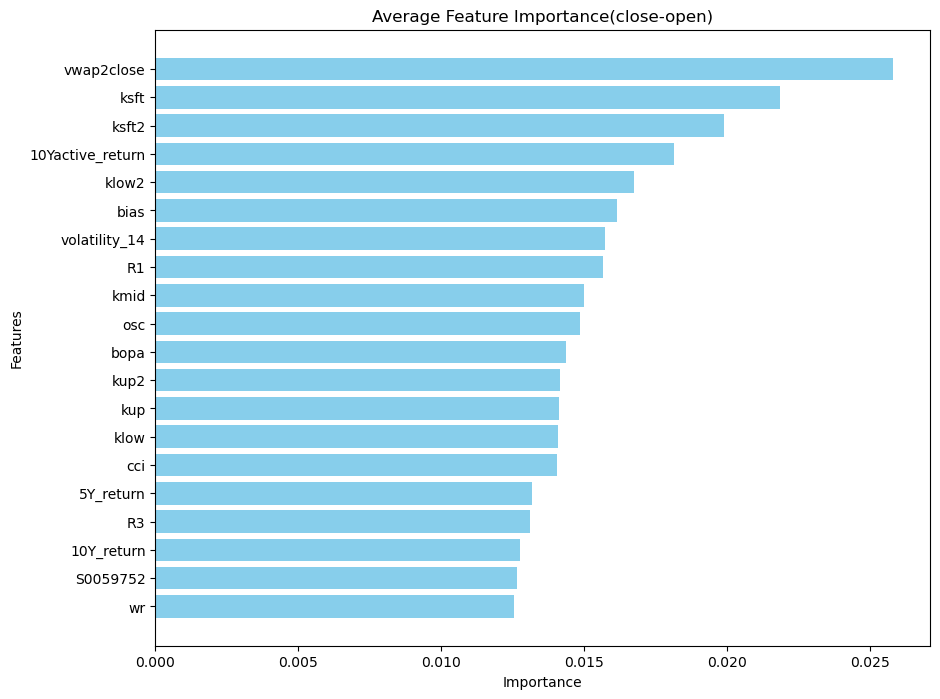

In [10]:
import matplotlib.pyplot as plt
# 绘制因子重要性图表
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'].iloc[:20], importance_df['importance'].iloc[:20], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Average Feature Importance(close-open)')
plt.gca().invert_yaxis()  # 倒置Y轴使重要性最高的因子排在顶部
plt.show()

In [11]:
#这里可以看概率，左边是跌（0）的概率，右边是涨（1）的概率

y_prob = best_rf.predict_proba(X_test)
y_prob[-1]

array([0.29559162, 0.70440838])

In [12]:
#报告最新一阶段的准确率、recall等
print(report)

              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.67      0.33      0.44         6

    accuracy                           0.44         9
   macro avg       0.50      0.50      0.44         9
weighted avg       0.56      0.44      0.44         9



In [13]:
#直接看涨跌，注意y——pred对应的是预测下个交易日的结果
all_results.loc[all_results.index>='2024-01-06'].tail(10)

,y_p,y,y_pred
date,,,
2025-09-08,0,0.004636,1
2025-09-09,0,-0.055641,0
2025-09-10,1,-0.236670,1
2025-09-11,1,0.023244,1
2025-09-12,1,0.106882,0
2025-09-15,1,0.106788,0
2025-09-16,1,0.297177,0
2025-09-17,1,0.157429,0
2025-09-18,0,0.013881,0


In [14]:
all_results.index=pd.to_datetime(all_results.index)
final=all_results.loc[all_results.index>='2024-01-01']
# 看某一个时期的计算准确度
correct = 0
for pred, true in zip(final['y_pred'], final['y_p']):
    if pred == true:
        correct += 1
accuracy = correct / len(final)*100
print(f'accuracy:',accuracy)
# Test the new function with the existing data to ensure the original DataFrame remains unchanged
#根据日期可以看某一时期的回测结果好坏。
financial_analysis_immutable_results,cum1,cum0 = financial_analysis_immutable(rf.loc[rf.index>='2024-01-01'])
financial_analysis_immutable_results


accuracy: 59.33014354066985


{'Cumulative Returns': np.float64(1.0746409845479539),
 'Cumulative Returns_basic': np.float64(1.001334605050508),
 'Annualized Return': np.float64(0.04435413631088769),
 'Annualized Return_basic': np.float64(0.0008043813429872149),
 'Sharpe Ratio': np.float64(2.148409548757911),
 'Sharpe Ratio_basic': np.float64(0.03791472872484177),
 'Maximum Drawdown': np.float64(-0.014349605625859156),
 'Maximum Drawdown_basic': np.float64(-0.0254237932476526)}

In [15]:
cumulative_returns_df=pd.DataFrame({
                                   'Random Forest':cum1,
                                   'SVM':cum0})
cumulative_returns_df


,Random Forest,SVM
date,,
2024-01-02,NaN,0.997960
2024-01-03,0.998831,0.999128
2024-01-04,0.999123,0.998837
2024-01-05,0.999609,0.999323
2024-01-08,0.999998,0.998934
...,...,...
2025-09-15,1.077059,0.998917
2025-09-16,1.074087,1.001888
2025-09-17,1.072513,1.003463


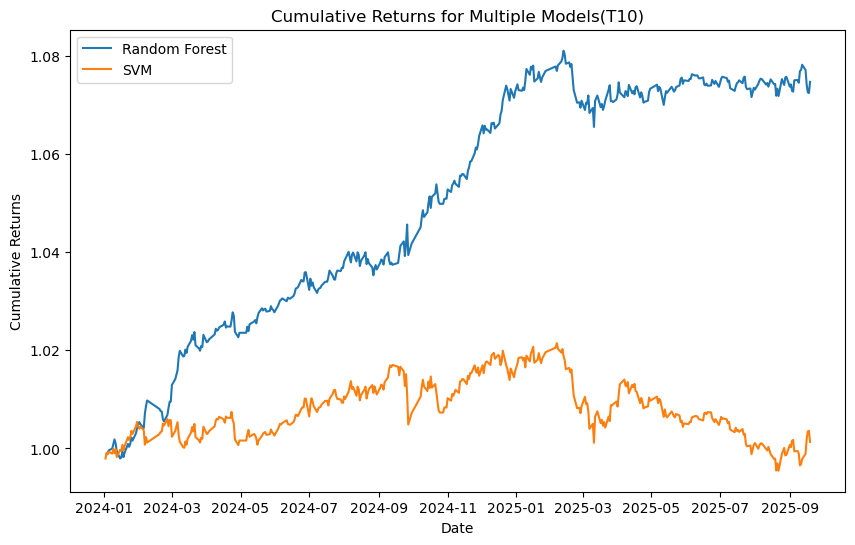

In [16]:
import matplotlib.pyplot as plt
# 绘制函数
plt.figure(figsize=(10,6))
#for column in cumulative_returns_df.columns:
plt.plot(cumulative_returns_df.index, cumulative_returns_df.values, label=cumulative_returns_df.columns)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title(f'Cumulative Returns for Multiple Models(T10)')
plt.legend()
ax = plt.gca()
#ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # 控制日期标签数量
#ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.show()


In [17]:
importance_df.head(20)

,feature,importance
107,vwap2close,0.025808
84,ksft,0.021841
85,ksft2,0.019897
2,10Yactive_return,0.018132
81,klow2,0.016723
74,bias,0.016155
102,volatility_14,0.015733
47,R1,0.015638
82,kmid,0.014977
97,osc,0.014853


In [18]:
#all_results.loc[all_results.index>='2022-01-06'].to_excel('C:/Users/gaozeyu_FI/Desktop/signaljqxx.xlsx')